# Until Daily_returns sheets are filled

In [40]:

%reset -f  # This will remove all variables from the workspace


Don't know how to reset  #, please run `%reset?` for details
Don't know how to reset  this, please run `%reset?` for details
Don't know how to reset  will, please run `%reset?` for details
Don't know how to reset  remove, please run `%reset?` for details
Don't know how to reset  all, please run `%reset?` for details
Don't know how to reset  variables, please run `%reset?` for details
Don't know how to reset  from, please run `%reset?` for details
Don't know how to reset  the, please run `%reset?` for details
Don't know how to reset  workspace, please run `%reset?` for details


In [18]:
import xlwings as xw
import pandas as pd
import yfinance as yf
from datetime import datetime

# Open the Excel file
wb = xw.Book('Sustains_xlwings_stress_test.xlsx')

# Load data from the 'Data' sheet using xlwings and pandas
sheet_data = wb.sheets['Data']
whole_first_sheet = pd.DataFrame(sheet_data.range('A2').expand().value)

# Assuming first column is stock tickers
data_universe = whole_first_sheet[0]

# Define the start and end dates for stock data download
start_date = "2015-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')

# Download stock data for the tickers in data_universe
data = yf.download(data_universe.tolist(), start=start_date, end=end_date)['Adj Close']
data = data[data_universe]
daily_returns_df = data.pct_change()
daily_returns_df = daily_returns_df.apply(lambda x: x.fillna(x.mean()), axis=0)
wb.sheets['Daily_returns'].clear_contents()  
wb.sheets['Daily_returns'].range('A1').value = daily_returns_df  

[*********************100%***********************]  18 of 18 completed
C:\Users\Ad\AppData\Local\Temp\ipykernel_24596\522284653.py:23: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns_df = data.pct_change()


# Price updation in excel

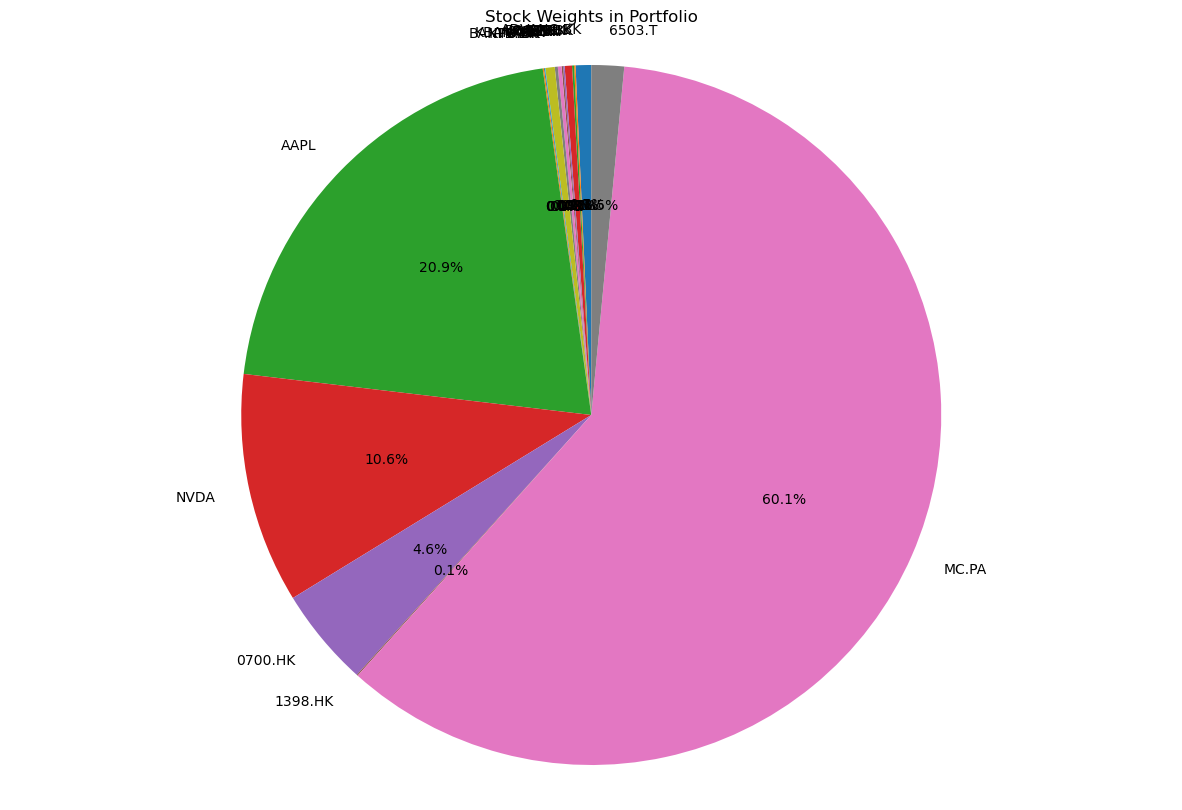

In [19]:
import matplotlib.pyplot as plt
import os


last_row = data.iloc[-1, :] 
sheet_data.range('D2').value = last_row.values.reshape(-1, 1)

# Read values from columns D and F
column_D = sheet_data.range('D2:D' + str(sheet_data.range('D2').end('down').row)).value  # Read column D values
column_F = sheet_data.range('F2:F' + str(sheet_data.range('F2').end('down').row)).value  # Read column F values

# Perform element-wise multiplication
column_G = [d * f for d, f in zip(column_D, column_F)]

# Write the result to column G (starting from G2)
sheet_data.range('G2').value = [[g] for g in column_G]

# Read values from columns E and G
column_E = sheet_data.range('E2:E' + str(sheet_data.range('E2').end('down').row)).value  # Read column E values
column_G = sheet_data.range('G2:G' + str(sheet_data.range('G2').end('down').row)).value  # Read column G values

# Perform element-wise multiplication
column_H = [e * g for e, g in zip(column_E, column_G)]

# Write the result to column H (starting from H2)
sheet_data.range('H2').value = [[h] for h in column_H]


# Read values from column H
column_H = sheet_data.range('H2:H' + str(sheet_data.range('H2').end('down').row)).value  # Read column H values

# Calculate the total sum of column H
total_sum_H = sum(column_H)

# Calculate the weight of each stock as a percentage
column_I = [(h / total_sum_H) * 100 for h in column_H]

# Write the result to column I (starting from I2)
sheet_data.range('I2').value = [[i] for i in column_I]

# Read stock names and values from column I (weights)
column_I = sheet_data.range('I2:I' + str(sheet_data.range('I2').end('down').row)).value  # Read column I values (weights)
stock_names = sheet_data.range('A2:A' + str(sheet_data.range('A2').end('down').row)).value  # Read stock names from column D

# Plot the pie chart using matplotlib
plt.figure(figsize=(15, 10))
plt.pie(column_I, labels=stock_names, autopct='%1.1f%%', startangle=90)
plt.title('Stock Weights in Portfolio')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Save the pie chart temporarily
chart_path = 'C:\\Users\\Ad\\OneDrive\\Documents\\Excel_for_risk_analysis\\Sustains_project_1\\pie_chart_temp.png'

plt.savefig(chart_path)

# Insert the pie chart image into the 'Data' sheet at L2
sheet_data.pictures.add(chart_path, left=sheet_data.range('L2').left, top=sheet_data.range('L2').top)

# Delete the pie chart file from the local machine after inserting into Excel
if os.path.exists(chart_path):
    os.remove(chart_path)

# Until benchmark sheet is filled

In [20]:
# Define the ticker symbols for the benchmarks
benchmarks = {
    'SET50': '^SET.BK',
    'S&P 500': '^GSPC',
    'Hang Seng': '^HSI',
    'Nifty 50': '^NSEI',
    'STOXX Europe 600': '^STOXX',
    'Nikkei 225': '^N225',
    'Shanghai Composite': '000001.SS',
    'MSCI World Index': 'URTH'
}

# Download benchmark data for all tickers
benchmark_data = {}
for name, ticker in benchmarks.items():
    benchmark_data[name] = yf.download(ticker, start=start_date, end=end_date)['Adj Close']

# Calculate percentage returns for each benchmark
benchmark_returns = pd.DataFrame()
for name, data in benchmark_data.items():
    benchmark_returns[name] = data.pct_change()

# Drop rows with any missing values (NaN)
clean_benchmark_returns = benchmark_returns.dropna()

# Open the existing Excel workbook
#wb = xw.Book('Sustains_xlwings_stress_test.xlsx')

# Access the existing 'Data_benchmark' worksheet
sheet_benchmark = wb.sheets['Data_benchmark']

# Clear any existing content in the sheet (optional, if you want to overwrite everything)
sheet_benchmark.clear()

# Write the clean benchmark returns data to the 'Data_benchmark' sheet
sheet_benchmark.range('A1').value = clean_benchmark_returns

# Save the workbook after writing the new data
wb.save()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# Asset allocation and risk management


,ADVANC.BK,CPF.BK,PTT.BK,EGCO.BK,RCL.BK,IVL.BK,AOT.BK,KKP.BK,KBANK.BK,BANPU.BK,TU.BK,KTB.BK,AAPL,NVDA,0700.HK,1398.HK,MC.PA,6503.T
weights,2.6041%,0.0000%,0.0000%,0.0000%,12.9176%,0.0000%,8.6846%,12.1704%,0.0000%,0.0000%,0.0000%,0.0000%,7.2140%,32.7665%,8.6295%,0.0000%,9.6746%,5.3385%


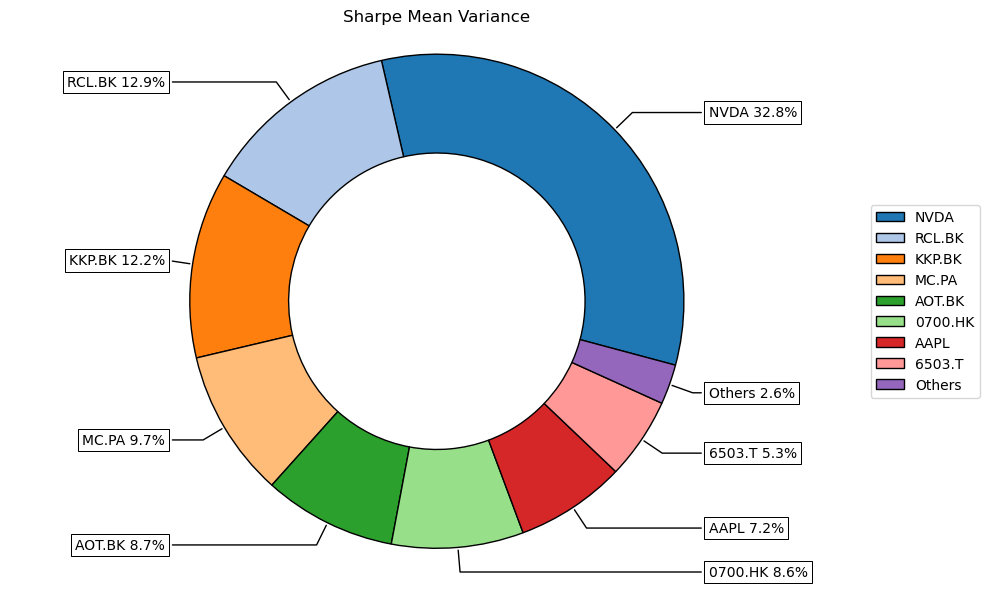

In [21]:
import numpy as np
import warnings
import riskfolio as rp

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format
Y= daily_returns_df



# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Load our custom estimates of input parameters
custom_mu = Y.mean()
custom_cov = Y.cov()

# Input manually the custom parameters:
port.mu = custom_mu / 100 # Custom mean vector.
port.cov = custom_cov / 100 # Custom covariance matrix.

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)
        

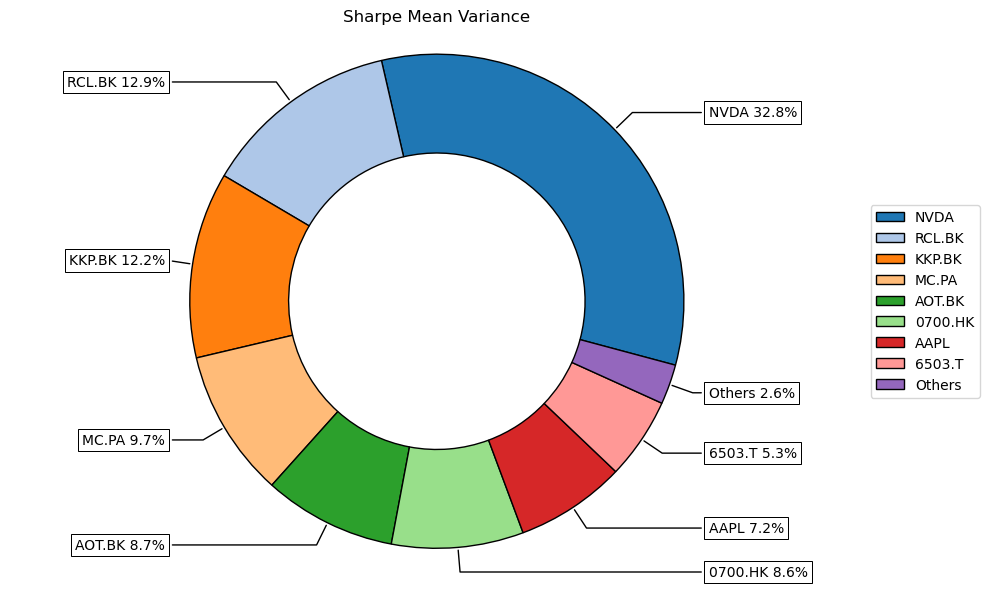

In [21]:
import matplotlib.pyplot as plt
import os


# Open the Excel file
wb = xw.Book('Sustains_xlwings_stress_test.xlsx')

# Access the 'Portfolio_management' sheet (create if it doesn't exist)
if 'Portfolio_management' not in [sheet.name for sheet in wb.sheets]:
    sheet_pm = wb.sheets.add('Portfolio_management')
else:
    sheet_pm = wb.sheets['Portfolio_management']

# Clear any existing content in the sheet (optional)
sheet_pm.clear()

# Clear existing pictures in the sheet to avoid duplicates
for picture in sheet_pm.pictures:
    picture.delete()

# Write portfolio weights to the 'Portfolio_management' sheet
sheet_pm.range('A1').value = w.T

# Plot the pie chart for portfolio weights
plt.figure(figsize=(6, 6))
ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap="tab20", height=6, width=10)

# Save the pie chart plot as an image
chart_path = 'C:\\Users\\Ad\\OneDrive\\Documents\\Excel_for_risk_analysis\\Sustains_project_1/pie_chart.png'
plt.savefig(chart_path)

# Insert the pie chart image into the 'Portfolio_management' sheet
sheet_pm.pictures.add(chart_path, 
                      left=sheet_pm.range('A6').left,  # Adjust the position where to insert the chart
                      top=sheet_pm.range('A6').top)


if os.path.exists(chart_path):
    os.remove(chart_path)

# Save and close the workbook
wb.save()

# Calculating beta


In [22]:
import pandas as pd

# Ensure both DataFrames have timezone-naive indices
daily_returns_df.index = daily_returns_df.index.tz_localize(None)
clean_benchmark_returns.index = clean_benchmark_returns.index.tz_localize(None)

# Initialize an empty dictionary to store betas
betas = {}

# Loop through each stock and benchmark pair
for i, stock in enumerate(whole_first_sheet[0]):  # Loop through all stock tickers
    benchmark_name = whole_first_sheet[1][i]  # Get the corresponding benchmark name

    # Get the stock and benchmark returns
    stock_returns = daily_returns_df[stock]
    benchmark_returns = clean_benchmark_returns[benchmark_name]
    
    # Calculate the covariance of the stock with the benchmark
    covariance = stock_returns.cov(benchmark_returns)
    
    # Calculate the variance of the benchmark
    variance = benchmark_returns.var()
    
    # Calculate the beta
    beta = covariance / variance
    
    # Store the result in the dictionary
    betas[stock] = beta

# Convert the betas dictionary to a DataFrame for better presentation
betas_df = pd.DataFrame(list(betas.items()), columns=['Stock', 'Beta'])

# Add a 'number' column starting from 1 instead of 0
betas_df.index = range(1, len(betas_df) + 1)
betas_df.index.name = 'Number'

# Access the existing 'Beta' sheet
sheet_beta = wb.sheets['Beta']

# Clear any existing content in the 'Beta' sheet
sheet_beta.clear()

# Write the betas DataFrame to the 'Beta' sheet
sheet_beta.range('A1').value = betas_df

# Align all content to the center
sheet_beta.range('A1').expand().api.HorizontalAlignment = xw.constants.HAlign.xlHAlignCenter

# Set color for A1, A2, and A3 to the green color with RGB(33, 206, 53)
sheet_beta.range('A1:D1').color = (33, 206, 53)


# Convert weights DataFrame (w.T) into a more usable format (dictionary)
portfolio_weights = w.T.to_dict(orient='records')[0]  # Convert weights to a dictionary where keys are stock tickers

# Initialize the portfolio beta
portfolio_beta = 0

# Loop through each stock in the portfolio and calculate the portfolio beta
for stock, weight in portfolio_weights.items():
    # Get the beta of the stock from betas_df
    stock_beta = betas_df.loc[betas_df['Stock'] == stock, 'Beta'].values[0]  # Fetch the beta for the stock
    # Add the weighted beta to the portfolio beta
    portfolio_beta += weight * stock_beta

# Display the portfolio beta
print(f"Portfolio Beta: {portfolio_beta}")

# Write the portfolio beta to the 'Beta' sheet in Excel, for example, in cell D1
sheet_beta.range('D1').value = 'Portfolio Beta'
sheet_beta.range('D2').value = portfolio_beta

# Save the workbook
wb.save()


Portfolio Beta: 1.289208276898916


In [23]:
portfolio_beta

1.289208276898916

In [24]:
wb.close()

In [26]:
data

Ticker,ADVANC.BK,CPF.BK,PTT.BK,EGCO.BK,RCL.BK,IVL.BK,AOT.BK,KKP.BK,KBANK.BK,BANPU.BK,TU.BK,KTB.BK,AAPL,NVDA,0700.HK,1398.HK,MC.PA,6503.T
Date,,,,,,,,,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2437.3959%,48.3177%,9989.9071%,332.7894%,11106.1417%,NaN
2015-01-05,16268.8095%,2068.6550%,2028.5177%,11445.2713%,554.4852%,1513.5865%,2484.7267%,2012.4443%,16593.6707%,918.4007%,1509.6792%,1463.2034%,2368.7305%,47.5016%,10051.9005%,334.5197%,10783.6082%,114492.9443%
2015-01-06,16138.1393%,2011.7191%,2080.0358%,11269.7296%,567.1591%,1490.3009%,2475.6254%,2064.7152%,16141.1133%,925.8672%,1454.7818%,1416.8575%,2368.9541%,46.0614%,10627.5612%,329.3288%,10660.5362%,111474.7925%
2015-01-07,16530.1544%,2030.6980%,2150.8732%,11445.2713%,576.6646%,1482.5388%,2575.7425%,2038.5794%,16442.8146%,933.3343%,1482.2309%,1476.4448%,2402.1713%,45.9414%,11017.2386%,331.6359%,10669.0231%,110918.7744%
2015-01-08,16334.1476%,2030.6980%,2189.5115%,11831.4621%,611.5179%,1521.3487%,2630.3520%,2064.7152%,17197.0764%,933.3343%,1516.5415%,1496.3076%,2494.4679%,47.6696%,11274.0723%,329.9056%,11004.2885%,112388.1592%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-16,26000.0000%,2470.0001%,3300.0000%,12300.0000%,2240.0000%,2390.0000%,6225.0000%,5175.0000%,15750.0000%,610.0000%,1510.0000%,2050.0000%,21632.0007%,11677.9999%,37779.9988%,426.0000%,60359.9976%,NaN
2024-09-17,26000.0000%,2470.0001%,3300.0000%,12300.0000%,2240.0000%,2400.0000%,6225.0000%,5075.0000%,15750.0000%,610.0000%,1510.0000%,2050.0000%,21678.9993%,11558.9996%,38000.0000%,434.0000%,60770.0012%,230250.0000%
2024-09-18,26000.0000%,2470.0001%,3300.0000%,12300.0000%,2240.0000%,2390.0000%,6225.0000%,5075.0000%,15750.0000%,610.0000%,1510.0000%,2050.0000%,22069.0002%,11337.0003%,NaN,NaN,59590.0024%,229000.0000%


In [27]:
import xlwings as xw
import pandas as pd
import yfinance as yf
from datetime import datetime

# Open the Excel file
wb = xw.Book('Sustains_xlwings_stress_test.xlsx')

# Load data from the 'Data' sheet using xlwings and pandas
sheet_data = wb.sheets['Data']
whole_first_sheet = pd.DataFrame(sheet_data.range('A2').expand().value)

# Assuming first column is stock tickers
data_universe = whole_first_sheet[0].tolist()

# Define the start and end dates for stock data download
start_date = "2015-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')

# Download stock data for the tickers in data_universe
try:
    data = yf.download(data_universe, start=start_date, end=end_date)['Adj Close']
except Exception as e:
    print(f"Error downloading data: {e}")
    data = pd.DataFrame()  # In case of error, create an empty DataFrame

# Handle missing data: forward fill, then fill any remaining with mean
data = data.fillna(method='ffill').fillna(data.mean())

# Calculate daily returns
daily_returns_df = data.pct_change()

# Fill any remaining NaN values in daily returns with the mean of each column
daily_returns_df = daily_returns_df.apply(lambda x: x.fillna(x.mean()), axis=0)

# Write daily returns back to the 'Daily_returns' sheet
wb.sheets['Daily_returns'].clear_contents()
wb.sheets['Daily_returns'].range('A1').value = daily_returns_df

# Save the workbook
wb.save()


[*********************100%%**********************]  18 of 18 completed


In [28]:
data

Ticker,0700.HK,1398.HK,6503.T,AAPL,ADVANC.BK,AOT.BK,BANPU.BK,CPF.BK,EGCO.BK,IVL.BK,KBANK.BK,KKP.BK,KTB.BK,MC.PA,NVDA,PTT.BK,RCL.BK,TU.BK
Date,,,,,,,,,,,,,,,,,,
2015-01-02,9989.9071%,332.7894%,142227.8749%,2437.3959%,16368.1698%,5649.2118%,848.7747%,2212.2926%,16184.9948%,3143.9996%,13498.6456%,4380.7522%,1360.4797%,11106.1417%,48.3177%,2999.3201%,1238.2558%,1422.6430%
2015-01-05,10051.9005%,334.5197%,114492.9443%,2368.7305%,16268.8095%,2484.7267%,918.4007%,2068.6550%,11445.2713%,1513.5865%,16593.6707%,2012.4443%,1463.2034%,10783.6082%,47.5016%,2028.5177%,554.4852%,1509.6792%
2015-01-06,10627.5612%,329.3288%,111474.7925%,2368.9541%,16138.1393%,2475.6254%,925.8672%,2011.7191%,11269.7296%,1490.3009%,16141.1133%,2064.7152%,1416.8575%,10660.5362%,46.0614%,2080.0358%,567.1591%,1454.7818%
2015-01-07,11017.2386%,331.6359%,110918.7744%,2402.1713%,16530.1544%,2575.7425%,933.3343%,2030.6980%,11445.2713%,1482.5388%,16442.8146%,2038.5794%,1476.4448%,10669.0231%,45.9414%,2150.8732%,576.6646%,1482.2309%
2015-01-08,11274.0723%,329.9056%,112388.1592%,2494.4679%,16334.1476%,2630.3520%,933.3343%,2030.6980%,11831.4621%,1521.3487%,17197.0764%,2064.7152%,1496.3076%,11004.2885%,47.6696%,2189.5115%,611.5179%,1516.5415%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-16,37779.9988%,426.0000%,231400.0000%,21632.0007%,26000.0000%,6225.0000%,610.0000%,2470.0001%,12300.0000%,2390.0000%,15750.0000%,5175.0000%,2050.0000%,60359.9976%,11677.9999%,3300.0000%,2240.0000%,1510.0000%
2024-09-17,38000.0000%,434.0000%,230250.0000%,21678.9993%,26000.0000%,6225.0000%,610.0000%,2470.0001%,12300.0000%,2400.0000%,15750.0000%,5075.0000%,2050.0000%,60770.0012%,11558.9996%,3300.0000%,2240.0000%,1510.0000%
2024-09-18,38000.0000%,434.0000%,229000.0000%,22069.0002%,26000.0000%,6225.0000%,610.0000%,2470.0001%,12300.0000%,2390.0000%,15750.0000%,5075.0000%,2050.0000%,59590.0024%,11337.0003%,3300.0000%,2240.0000%,1510.0000%


In [29]:
# Download stock data for the tickers in data_universe
try:
    data = yf.download(data_universe, start=start_date, end=end_date)['Adj Close']
    print(data.head())  # Check if the data is already scaled/multiplied by 100
except Exception as e:
    print(f"Error downloading data: {e}")
    data = pd.DataFrame()  # In case of error, create an empty DataFrame


[*********************100%%**********************]  18 of 18 completed

Ticker         0700.HK   1398.HK       6503.T       AAPL   ADVANC.BK  \
Date                                                                   
2015-01-02  9989.9071% 332.7894%          NaN 2437.3959%         NaN   
2015-01-05 10051.9005% 334.5197% 114492.9443% 2368.7305% 16268.8095%   
2015-01-06 10627.5612% 329.3288% 111474.7925% 2368.9541% 16138.1393%   
2015-01-07 11017.2386% 331.6359% 110918.7744% 2402.1713% 16530.1544%   
2015-01-08 11274.0723% 329.9056% 112388.1592% 2494.4679% 16334.1476%   

Ticker         AOT.BK  BANPU.BK     CPF.BK     EGCO.BK     IVL.BK    KBANK.BK  \
Date                                                                            
2015-01-02        NaN       NaN        NaN         NaN        NaN         NaN   
2015-01-05 2484.7267% 918.4007% 2068.6550% 11445.2713% 1513.5865% 16593.6707%   
2015-01-06 2475.6254% 925.8672% 2011.7191% 11269.7296% 1490.3009% 16141.1133%   
2015-01-07 2575.7425% 933.3343% 2030.6980% 11445.2713% 1482.5388% 16442.8146%   
2015-01-0

In [30]:
# Ensure no scaling is applied when processing daily returns
daily_returns_df = data.pct_change()

# Verify that daily returns are in the correct format
print(daily_returns_df.head())


Ticker      0700.HK  1398.HK   6503.T     AAPL  ADVANC.BK   AOT.BK  BANPU.BK  \
Date                                                                           
2015-01-02      NaN      NaN      NaN      NaN        NaN      NaN       NaN   
2015-01-05  0.6206%  0.5199%      NaN -2.8172%        NaN      NaN       NaN   
2015-01-06  5.7269% -1.5517% -2.6361%  0.0094%   -0.8032% -0.3663%   0.8130%   
2015-01-07  3.6667%  0.7005% -0.4988%  1.4022%    2.4291%  4.0441%   0.8065%   
2015-01-08  2.3312% -0.5218%  1.3247%  3.8422%   -1.1858%  2.1201%   0.0000%   

Ticker       CPF.BK  EGCO.BK   IVL.BK  KBANK.BK   KKP.BK   KTB.BK    MC.PA  \
Date                                                                         
2015-01-02      NaN      NaN      NaN       NaN      NaN      NaN      NaN   
2015-01-05      NaN      NaN      NaN       NaN      NaN      NaN -2.9041%   
2015-01-06 -2.7523% -1.5337% -1.5384%  -2.7273%  2.5974% -3.1674% -1.1413%   
2015-01-07  0.9434%  1.5576% -0.5208%   1.8691% -

In [31]:
pip install --upgrade yfinance



   ---------------------------------------- 0.0/84.6 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/84.6 kB ? eta -:--:--
   -------------------------------------- - 81.9/84.6 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 84.6/84.6 kB 1.2 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.41
    Uninstalling yfinance-0.2.41:
      Successfully uninstalled yfinance-0.2.41


In [32]:
import xlwings as xw
import pandas as pd
import yfinance as yf
from datetime import datetime

# Open the Excel file
wb = xw.Book('Sustains_xlwings_stress_test.xlsx')

# Load data from the 'Data' sheet using xlwings and pandas
sheet_data = wb.sheets['Data']
whole_first_sheet = pd.DataFrame(sheet_data.range('A2').expand().value)

# Assuming first column is stock tickers
data_universe = whole_first_sheet[0].tolist()

# Define the start and end dates for stock data download
start_date = "2015-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')

# Download stock data for the tickers in data_universe
try:
    data = yf.download(data_universe, start=start_date, end=end_date)['Adj Close']
except Exception as e:
    print(f"Error downloading data: {e}")
    data = pd.DataFrame()  # In case of error, create an empty DataFrame

# Handle missing data: forward fill, then fill any remaining with mean
data = data.fillna(method='ffill').fillna(data.mean())

[*********************100%%**********************]  18 of 18 completed


In [33]:
data

Ticker,0700.HK,1398.HK,6503.T,AAPL,ADVANC.BK,AOT.BK,BANPU.BK,CPF.BK,EGCO.BK,IVL.BK,KBANK.BK,KKP.BK,KTB.BK,MC.PA,NVDA,PTT.BK,RCL.BK,TU.BK
Date,,,,,,,,,,,,,,,,,,
2015-01-02,9989.9071%,332.7894%,142227.8749%,2437.3959%,16368.1698%,5649.2118%,848.7747%,2212.2926%,16184.9948%,3143.9996%,13498.6456%,4380.7522%,1360.4797%,11106.1417%,48.3177%,2999.3201%,1238.2558%,1422.6430%
2015-01-05,10051.9005%,334.5197%,114492.9443%,2368.7305%,16268.8095%,2484.7267%,918.4007%,2068.6550%,11445.2713%,1513.5865%,16593.6707%,2012.4443%,1463.2034%,10783.6082%,47.5016%,2028.5177%,554.4852%,1509.6792%
2015-01-06,10627.5612%,329.3288%,111474.7925%,2368.9541%,16138.1393%,2475.6254%,925.8672%,2011.7191%,11269.7296%,1490.3009%,16141.1133%,2064.7152%,1416.8575%,10660.5362%,46.0614%,2080.0358%,567.1591%,1454.7818%
2015-01-07,11017.2386%,331.6359%,110918.7744%,2402.1713%,16530.1544%,2575.7425%,933.3343%,2030.6980%,11445.2713%,1482.5388%,16442.8146%,2038.5794%,1476.4448%,10669.0231%,45.9414%,2150.8732%,576.6646%,1482.2309%
2015-01-08,11274.0723%,329.9056%,112388.1592%,2494.4679%,16334.1476%,2630.3520%,933.3343%,2030.6980%,11831.4621%,1521.3487%,17197.0764%,2064.7152%,1496.3076%,11004.2885%,47.6696%,2189.5115%,611.5179%,1516.5415%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-16,37779.9988%,426.0000%,231400.0000%,21632.0007%,26000.0000%,6225.0000%,610.0000%,2470.0001%,12300.0000%,2390.0000%,15750.0000%,5175.0000%,2050.0000%,60359.9976%,11677.9999%,3300.0000%,2240.0000%,1510.0000%
2024-09-17,38000.0000%,434.0000%,230250.0000%,21678.9993%,26000.0000%,6225.0000%,610.0000%,2470.0001%,12300.0000%,2400.0000%,15750.0000%,5075.0000%,2050.0000%,60770.0012%,11558.9996%,3300.0000%,2240.0000%,1510.0000%
2024-09-18,38000.0000%,434.0000%,229000.0000%,22069.0002%,26000.0000%,6225.0000%,610.0000%,2470.0001%,12300.0000%,2390.0000%,15750.0000%,5075.0000%,2050.0000%,59590.0024%,11337.0003%,3300.0000%,2240.0000%,1510.0000%


In [35]:
data1= yf.download('AAPL')

[*********************100%%**********************]  1 of 1 completed


In [36]:
data1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,12.8348%,12.8906%,12.8348%,12.8348%,9.8943%,469033600
1980-12-15,12.2210%,12.2210%,12.1652%,12.1652%,9.3781%,175884800
1980-12-16,11.3281%,11.3281%,11.2723%,11.2723%,8.6898%,105728000
1980-12-17,11.5513%,11.6071%,11.5513%,11.5513%,8.9049%,86441600
1980-12-18,11.8862%,11.9420%,11.8862%,11.8862%,9.1630%,73449600
...,...,...,...,...,...,...
2024-09-16,21653.9993%,21722.0001%,21391.9998%,21632.0007%,21632.0007%,59357400
2024-09-17,21575.0000%,21689.9994%,21450.0000%,21678.9993%,21678.9993%,45519300
2024-09-18,21755.0003%,22271.0007%,21753.9993%,22069.0002%,22069.0002%,59894900


In [37]:
import yfinance as yf

# Define the ticker and date range
ticker = 'AAPL'
start_date = "2015-01-01"
end_date = "2024-09-20"

# Download the stock data
data = yf.download(ticker, start=start_date, end=end_date)

# Display the first few rows of raw data
print(data.head())


[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2015-01-02 2784.7500% 2786.0001% 2683.7500% 2733.2500% 2437.3957%  212818400
2015-01-05 2707.2500% 2716.2500% 2635.2501% 2656.2500% 2368.7307%  257142000
2015-01-06 2663.5000% 2685.7500% 2615.7499% 2656.5001% 2368.9541%  263188400
2015-01-07 2679.9999% 2704.9999% 2667.4999% 2693.7500% 2402.1719%  160423600
2015-01-08 2730.7501% 2803.7500% 2717.4999% 2797.2500% 2494.4683%  237458000


In [38]:
import yfinance as yf

# Define the ticker and date range
ticker = 'AAPL'
start_date = "2015-01-01"
end_date = "2024-09-20"

# Download the stock data
data = yf.download(ticker, start=start_date, end=end_date)

# Scale down the price columns by dividing by 100 if they're in percentage format
if data[['Open', 'High', 'Low', 'Close', 'Adj Close']].max().max() > 1000:  # Check if the values are unusually large
    print("Data appears to be scaled by 100. Correcting...")
    data[['Open', 'High', 'Low', 'Close', 'Adj Close']] = data[['Open', 'High', 'Low', 'Close', 'Adj Close']] / 100

# Display the corrected data
print(data.head())

# Now you can proceed with your further analysis or writing it to Excel


[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2015-01-02 2784.7500% 2786.0001% 2683.7500% 2733.2500% 2437.3957%  212818400
2015-01-05 2707.2500% 2716.2500% 2635.2501% 2656.2500% 2368.7307%  257142000
2015-01-06 2663.5000% 2685.7500% 2615.7499% 2656.5001% 2368.9541%  263188400
2015-01-07 2679.9999% 2704.9999% 2667.4999% 2693.7500% 2402.1719%  160423600
2015-01-08 2730.7501% 2803.7500% 2717.4999% 2797.2500% 2494.4683%  237458000


In [3]:
# Historical Stress Test
import yfinance as yf

# Define historical crisis periods
crisis_periods = {
    'Dot-com Bubble': ('2000-03-01', '2002-10-01'),
    '2008 Financial Crisis': ('2007-10-01', '2009-03-01'),
    'COVID-19 Crash': ('2020-02-01', '2020-03-31')
}

# Download stock data again for crisis periods
for crisis, (start, end) in crisis_periods.items():
    crisis_data = yf.download(data_universe.tolist(), start=start, end=end)['Adj Close']
    
    # Calculate daily returns during the crisis period
    crisis_returns = crisis_data.pct_change().mean() * 100  # Average daily return in %
    
    # Print the results
    print(f"{crisis} ({start} to {end}):\n{crisis_returns}\n")


[*********************100%***********************]  18 of 18 completed

4 Failed downloads:
['IVL.BK', 'AOT.BK']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2000-03-01 -> 2002-10-01) (Yahoo error = "Data doesn\'t exist for startDate = 951843600, endDate = 1033405200")')
['0700.HK', '1398.HK']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2000-03-01 -> 2002-10-01) (Yahoo error = "Data doesn\'t exist for startDate = 951840000, endDate = 1033401600")')
C:\Users\Ad\AppData\Local\Temp\ipykernel_24596\2213342829.py:16: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  crisis_returns = crisis_data.pct_change().mean() * 100  # Average daily return in %


Dot-com Bubble (2000-03-01 to 2002-10-01):
Ticker
0700.HK           NaN
1398.HK           NaN
6503.T      -0.095829
AAPL        -0.119246
ADVANC.BK    0.012497
AOT.BK            NaN
BANPU.BK     0.164850
CPF.BK      -0.001732
EGCO.BK      0.106453
IVL.BK            NaN
KBANK.BK    -0.020671
KKP.BK       0.158662
KTB.BK      -0.009234
MC.PA       -0.067483
NVDA         0.118476
PTT.BK       0.108412
RCL.BK       0.200198
TU.BK       -4.855576
dtype: float64



[*********************100%***********************]  18 of 18 completed

1 Failed download:
['IVL.BK']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2007-10-01 -> 2009-03-01) (Yahoo error = "Data doesn\'t exist for startDate = 1191171600, endDate = 1235840400")')
C:\Users\Ad\AppData\Local\Temp\ipykernel_24596\2213342829.py:16: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  crisis_returns = crisis_data.pct_change().mean() * 100  # Average daily return in %


2008 Financial Crisis (2007-10-01 to 2009-03-01):
Ticker
0700.HK      0.061235
1398.HK     -0.091422
6503.T      -0.273385
AAPL        -0.094167
ADVANC.BK    0.020246
AOT.BK      -0.254980
BANPU.BK    -0.059204
CPF.BK      -0.093066
EGCO.BK     -0.103414
IVL.BK            NaN
KBANK.BK    -0.125572
KKP.BK      -0.258503
KTB.BK      -0.223454
MC.PA       -0.123077
NVDA        -0.288741
PTT.BK      -0.150963
RCL.BK      -0.397357
TU.BK       -0.033565
dtype: float64



[*********************100%***********************]  18 of 18 completed

COVID-19 Crash (2020-02-01 to 2020-03-31):
Ticker
0700.HK      0.011301
1398.HK      0.000009
6503.T      -0.306749
AAPL        -0.347584
ADVANC.BK   -0.004402
AOT.BK      -0.748618
BANPU.BK    -1.426748
CPF.BK      -0.295245
EGCO.BK     -0.581301
IVL.BK      -0.808333
KBANK.BK    -1.104959
KKP.BK      -1.353718
KTB.BK      -0.870185
MC.PA       -0.242365
NVDA         0.466313
PTT.BK      -0.719317
RCL.BK      -0.952797
TU.BK       -0.147931
dtype: float64




C:\Users\Ad\AppData\Local\Temp\ipykernel_24596\2213342829.py:16: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  crisis_returns = crisis_data.pct_change().mean() * 100  # Average daily return in %


In [25]:
# Access the 'Data' sheet
sheet_data_part2 = wb.sheets['Data']

# Get the data from columns D to I, including headers
data_range = sheet_data_part2.range('D1').expand().value

# Convert the data_range into a pandas DataFrame (first row is the header)
df_data_range = pd.DataFrame(data_range[1:], columns=data_range[0])

# Calculate the total portfolio value by summing the 'Value' column
portfolio_value = df_data_range['Value'].sum()

# Hypothetical Stress Test using Portfolio Beta
shock_percentage = -0.20  # Assuming a 20% market drop

# Adjust the shock percentage according to the portfolio beta (already defined in an upper cell)
adjusted_shock = shock_percentage * portfolio_beta

# Calculate the new value of each asset after the adjusted shock
df_data_range['Value_after_shock'] = df_data_range['Value'] * (1 + adjusted_shock)

# Calculate the total portfolio value after the adjusted shock
total_value_after_shock = df_data_range['Value_after_shock'].sum()

# Calculate the portfolio loss due to the hypothetical shock
portfolio_loss = portfolio_value - total_value_after_shock

# Display the results
print(f"Total Portfolio Value Before Shock: {portfolio_value}")
print(f"Total Portfolio Value After {shock_percentage*100}% Market Shock (Adjusted for Beta): {total_value_after_shock}")
print(f"Portfolio Loss: {portfolio_loss}")



Total Portfolio Value Before Shock: 3628728.222510338
Total Portfolio Value After -20.0% Market Shock (Adjusted for Beta): 2693090.930694934
Portfolio Loss: 935637.2918154038
